# Descripción del proyecto

**Autor:** Cristian Jeraldo, www.asgeominspa.com

**Fecha:** 13 de junio de 2024

**Descripción:** Este notebook contiene los pasos necesarios para desarrollar un análisis de exactitud analítica, incluyendo la visualización de resultados y la aplicación de técnicas estadísticas de medición.

---

# Importación de librerías

In [1]:
# Librerías visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías manipulación de datos
import numpy as np
import pandas as pd

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importación de datos

In [2]:
# Importación de datos
df = pd.read_csv('MSD-ALTO_AAA_Cu_Fe_Au_Co_S.csv')

In [3]:
df.head(3)

,SAMPLE_ID,Inserto,Cu,Fe,Au,Co,S,Origen
0,STD HIGH 1,1,1.662,50.31,0.295,370,1.78,P2022-111 Análisis Estandares MSDv3.xlsx
1,STD HIGH 2,2,1.682,49.97,0.271,360,1.78,P2022-111 Análisis Estandares MSDv3.xlsx
2,STD HIGH 3,3,1.665,48.97,0.346,370,1.79,P2022-111 Análisis Estandares MSDv3.xlsx


In [4]:
df.shape

(30, 8)

# Gráfico de Exactitud

In [5]:
# Ejes para gráfico de control de exactitud
x = df['Inserto']
y = df['Au']

In [6]:
# Editar analito y laboratorio 
analito = 'Au'
lab = 'Bureau Veritas Antofagasta, Chile'

In [7]:
# Media y desviación estándar del CRM
av = 0.299
desvest = 0.02213

In [8]:
# Bandas de aceptación
minus2SD = av - 2 * desvest
minus3SD = av - 3 * desvest
plus2SD = av + 2 * desvest
plus3SD = av + 3 * desvest

In [9]:
# Chequeo
minus3SD

0.23260999999999998

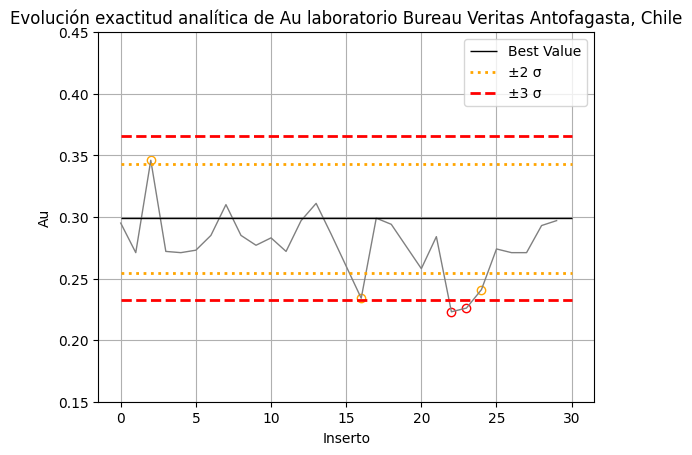

In [19]:
# Gráfico de control de Shewhart
fig,ax = plt.subplots()

ax.set_title("Evolución exactitud analítica de {} laboratorio {}".format(analito,lab))

# lineplot de insertos 
ax.plot(y, color='grey', linewidth=1)

# lineplot edgecolors para warnings y error
for i in range(1,len(y)):
    if y[i] < minus3SD or y[i] > plus3SD:
        ax.scatter(x[i-1],y[i], edgecolors='red', color='white')
    elif y[i] < minus2SD or y[i] > plus2SD:
        ax.scatter(x[i-1],y[i], edgecolors='orange', color='white')    
    else:
        ax.scatter(x[i-1],y[i], color='white')       
    
# Líneas de control    
ax.hlines(y=av, xmin=0, xmax=len(df), linewidth=1, color='black', linestyles='-', label='Best Value')
ax.hlines(y=minus2SD, xmin=0, xmax=len(df), linewidth=2, color='orange', linestyles=':', label='±2 σ')
ax.hlines(y=plus2SD, xmin=0, xmax=len(df), linewidth=2, color='orange', linestyles=':')
ax.hlines(y=minus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--', label='±3 σ')
ax.hlines(y=plus3SD, xmin=0, xmax=len(df), linewidth=2, color='red', linestyles='--')
plt.legend()

# Editar rango eje Y (ley) y frecuencia de tick marks
plt.ylim([0.15,0.45])
plt.yticks(np.arange(0.15,0.45,0.05))

# Ploteo de grilla
plt.grid()

# Títulos de ejes
plt.xlabel('Inserto')
plt.ylabel(analito);

**Comentarios:**
- Se identifican resultados con fallas: sesgo significativo (subestimación) para algunos batch 
- Sin exceso de puntos consecutivos en mismo por sobre o debajo de valor esperado: ausencia de sesgo moderado
- Presencia de algunos puntos consecutivos sobre 2 STD: sesgo moderado            

# Cálculo de sesgo

In [11]:
# Valor medio análisis de CRM
prom = df['Au'].mean()
prom.round(3)

0.278

In [12]:
# Cálculo de sesgo
sesgo = (prom - av) / av * 100

In [13]:
print("Sesgo de {} para CRM ALTO en laboratorio {} es {:.2f}".format(analito,lab,sesgo))

Sesgo de Au para CRM ALTO en laboratorio Bureau Veritas Antofagasta, Chile es -7.08


**Conclusión:**
- Sin evidencia de sesgo significativo a nivel global (todas las campañas).